In [1]:
%matplotlib inline
import os, sys, pickle
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn

/share/apps/matplotlib/1.5.0/intel/lib/python2.7/site-packages/matplotlib-1.5.0-py2.7-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
from sklearn import discriminant_analysis, feature_extraction, decomposition

In [5]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000


### Getting the data

In [6]:
!ls -a

.				    process_data.ipynb
..				    testing-vectors.ipynb
auburn_appct_stata.dta		    Untitled.ipynb
auburn_district_w_songer_codes.dta  V3CircuitJudgesBIO.dta
docvecs_0.txt			    V3DistrictJudgesBIO.dta
docvecs_1.txt			    vectors2.log
docvecs_2.txt			    vectors2.py
docvecs.p			    vectors.log
id_case_map.csv			    vectors.py
.ipynb_checkpoints


In [7]:
docvecs = pickle.load(open('docvecs.p','rb'))

/home/sv1239/.local/lib/python2.7/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [8]:
model0 = docvecs[0]
model1 = docvecs[1]
model2 = docvecs[2]

In [9]:
n = model0.count
print n

675


In [10]:
X = []
for i in range(n):
    X.append(model0[i])

In [11]:
X = np.array(X)

In [12]:
X.shape

(675, 100)

In [13]:
model0.doctags

{}

#### Judge Bio data

In [14]:
v3c = pd.read_stata('/home/sv1239/projects/chen/V3CircuitJudgesBIO.dta')

In [15]:
v3d = pd.read_stata('/home/sv1239/projects/chen/V3DistrictJudgesBIO.dta')

In [16]:
aub_c = pd.read_stata('/home/sv1239/projects/chen/auburn_appct_stata.dta')
aub_d = pd.read_stata('/home/sv1239/projects/chen/auburn_district_w_songer_codes.dta')

In [17]:
v3c.head()

,songername,circuit,start_date,senior_date,end_date,x_dem,x_repub,x_insba,x_elev,x_unity,x_aba,x_crossa,x_pfed,x_pothfe,x_plprof,x_pscab,x_pcab,x_pusa,x_pssen,x_paag,x_psp,x_pslc,x_pssc,x_pshou,x_psg,x_psgo,x_psen,x_psat,x_ppriv,x_pmayor,x_plocct,x_phous,x_pgov,x_pda,x_pcc,x_pccoun,x_pausa,x_pasat,x_pag,x_pada,x_pgovt,x_llmsjd,x_prot,x_evang,x_mline,x_norel,x_cath,x_jew,x_black,x_nw,x_fem,x_jdpub,x_bapub,x_b10s,x_b20s,x_b30s,x_b40s,x_b50s,x_pbank,x_pmag,x_ageon40s,x_ageon50s,x_ageon60s,x_ageles40,x_agemor70,x_pago,retirementfromactiveservice,start_year,senior_year,end_year,x_secular
0,"ACHESON, MARCUS W.",3,-25168,NaN,-19552,0,1,0,1,1,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,0,0,1,0,1,0,1,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,,1891,NaN,1906,0
1,"ADAMS, ARLIN M.",3,3562,NaN,9863,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,,1969,NaN,1987,1
2,"AGEE, G. STEVEN",4,17714,NaN,NaN,0,1,1,0,0,1,0,0,NaN,0,NaN,NaN,0,0,NaN,NaN,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,,2008,NaN,NaN,0
3,"AINSWORTH, ROBERT",5,2394,NaN,8026,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,,1966,NaN,1981,0
4,"ALARCON, ARTHUR L.",9,7245,12013,NaN,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,11/21/1992,1979,1992,NaN,0


In [56]:
v3d.head(100)

,songername,district,Courthouse,start_date,senior_date,end_date,x_dem,x_repub,x_insba,x_elev,x_unity,x_aba,x_crossa,x_pfed,x_pothfe,x_plprof,x_pscab,x_pcab,x_pusa,x_pssen,x_paag,x_psp,x_pslc,x_pssc,x_pshou,x_psg,x_psgo,x_psen,x_psat,x_ppriv,x_pmayor,x_plocct,x_phous,x_pgov,x_pda,x_pcc,x_pccoun,x_pausa,x_pasat,x_pag,x_pada,x_pgovt,x_llmsjd,x_prot,x_evang,x_mline,x_norel,x_cath,x_jew,x_black,x_nw,x_fem,x_jdpub,x_bapub,x_b10s,x_b20s,x_b30s,x_b40s,x_b50s,x_pbank,x_pmag,x_ageon40s,x_ageon50s,x_ageon60s,x_ageles40,x_agemor70,x_pago,retirementfromactiveservice,start_year,senior_year,end_year
0,"ABRAMS, RONNIE",0208,,19075,NaN,NaN,1,0,1,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,,2012,NaN,NaN
1,"ABRUZZO, MATTHEW J.",0207,Brooklyn,-8721,2237,4165,1,0,0,NaN,1,0,0,NaN,1,0,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,02/15/1966,1936,1966,1971
2,"ACHESON, MARCUS W.",0315,Pittsburgh,-29206,NaN,-25162,0,1,0,NaN,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1,0,1,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,,1880,NaN,1891
3,"ACKER, WILLIAM MARSH, JR.",1126,Birmingham,8265,13300,NaN,0,1,1,NaN,0,0,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,05/31/1996,1982,1996,NaN
4,"ACKERMAN, HAROLD ARNOLD",0312,NEWARK,7245,12464,18233,1,0,0,NaN,1,1,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,02/15/1994,1979,1994,2009
5,"ACKERMAN, JAMES WALDO",0754,,6027,NaN,7029,0,1,0,NaN,0,1,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,,1976,NaN,1979
6,"ACKERMAN, JAMES WALDO",0753,Springfield,7029,NaN,9093,0,1,0,NaN,0,1,0,NaN,1,0,NaN,NaN,0,0,NaN,NaN,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,,1979,NaN,1984
7,"ACOSTA, RAYMOND L.",0104,SAN JUAN,8308,12570,NaN,0,1,0,NaN,0,0,0,NaN,1,0,NaN,NaN,1,0,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,NaN,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,06/01/1994,1982,1994,NaN
8,"ADAIR, JEFFERSON LEROY",0754,,-8284,NaN,-1443,1,0,1,NaN,1,0,0,NaN,NaN,0,NaN,NaN,0,1,NaN,NaN,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,NaN,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,,1937,NaN,1956
9,"ADAMS, ELMER B.",0865,Saint Louis,-23604,NaN,-19940,1,0,0,NaN,0,0,0,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,,1895,NaN,1905


In [55]:
aub_c.head(100)

,pname,id,pres,mona,yeara,monl,yearl,yearb,yeard,pleft,left,party,state,city,circuit,elevate,gender,race,name,appres,pleftsum,boom,crossa,crossl,mrespty,prespty,dummy,ids,religion,csb,ba,bast,bapp,ls,lsst,jdpp,graddeg1,graddeg2,graddeg3,pfedjdge,pfjdget,pssc,pslc,plocct,poutsjge,psjdget,pausa,pusa,psgo,psg,pago,paag,pag,pcc,psp,pspros,pmag,pbj,pcab,pcabdept,pscab,pscabdpt,pindreg1,preg1,pindreg2,preg2,pindreg3,preg3,pindreg4,preg4,pindreg5,preg5,phouse,psenate,pgov,pssenate,pshouse,pmayor,pccoun,pccom,pda,plother,plotherl,pgovt,plawprof,pprivate,prevpos,pmagis,pcomct,pdat,pada,pbank,pterr,pcustom,statecab,age,extra1,extra2,extra3,extra4,amon,ayear,___l,___j,___char,pos1,pos1yrs,pos2,pos2yrs,pos3,pos3yrs,pos4,pos4yrs,pos5,pos5yrs,pos6,pos6yrs,pos7,pos7yrs,pos8,pos8yrs,pos9,pos9yrs,pos10,pos10yrs,pos11,pos11yrs,pos12,pos12yrs,pos13,pos13yrs,pos14,pos14yrs,pos15,pos15yrs,type,pred,recdatem,recdatey,reccon,extra5,assets,liable,aba,add1,abamin,seatno,success,seatno2,pseatno,lsuc,ls2,ls3,lp,lp2,lp3,ls1,count,seatno4,pseatno4,sseatno4,seatno3,pseatno3,sseatno3,lsuc2,pseatno2,sseatno2,sseatno,sids,tids,samon,sayear,tamon,tayear,year,dsen,rsen,dhouse,rhouse,dal,dak,daz,dar,dca,dco,dct,dde,dfl,dga,dhi,did,dil,din,dio,dks,dky,dla,dme,dmd,dma,dmi,dmn,dms,dmo,dmt,dne,dnv,dnh,dnj,dnm,dny,dnc,dnd,doh,dok,dor,dpa,dri,dsc,dsd,dtn,dtx,dut,dvt,dva,dwa,dwv,dwi,dwy,source1,source2,courtesy,appage,sseatno5,sseatno6,pname2,pname3,pname4,dcother,uporoutt,senmaj,senmin,yeari,yearc,congress,unity,e1,e2,e3,e4,e5,e6,congresi,unityi,hdem,hrep,sdem,srep,hother,sother,yearo,congreso,unityo,recess,networth,agego,service,ageon
0,"McKennan, William",5,4,1,1891,6,1906,1828,1906,8,1,0,38,3870,3,1,1,1,"Acheson, Marcus W.",0,0,1,0,0,0,NaN,1,NaN,7,3891,124,1,1,125,3,3,0,0,0,1,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,63,NaN,NaN,NaN,NaN,2,1891,NaN,NaN,,1,11,31,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,8944,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,03.01.02,03.01.03,,03.01.01,,,,,,,,1,,,,,,,,,,03.01.03,NaN,NaN,NaN,NaN,NaN,NaN,1891,39,47,231,88,2,NaN,NaN,2,0,0,0,1,2,2,NaN,0,1,2,0,0,2,2,0,2,0,0,0,2,2,0,0,0,0,2,NaN,0,2,0,1,NaN,0,0,0,2,0,2,2,NaN,0,2,0,2,1,0,13,14,0,63,,,,,,NaN,1,39,37,1890,1906,59TH,0,136,250,32,58,,,51ST,0,156,173,37,47,1,0,1906,59TH,0,0,NaN,78,15,63
1,"Kalodner, Harry E.",35,19,11,1969,1,1987,1921,9999,22,3,0,38,3860,3,25,1,1,"Adams, Arlin M.",0,0,0,0,0,0,NaN,1,301,5,3860,85,0,0,68,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,31,0,0,0,0,0,0,0,4,48,NaN,NaN,NaN,NaN,10,1969,NaN,NaN,,31,2,125,3,31,8,163,5,31,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6060,NaN,NaN,0,NaN,NaN,NaN,1,0,0,03.02.08,03.02.09,,03.02.07,03.01.02,,,03.01.01,,,03.01.03,1,,,,,,,,,,03.02.09,NaN,NaN,NaN,NaN,NaN,NaN,1969,58,42,243,192,2,1,0,2,1,0,2,0,1,2,1,1,0,2,1,0,0,2,1,1,1,1,2,2,2,2,0,2,1,1,2,1,2,1,1,1,0,0,2,1,1,1,1,1,0,2,2,2,2,1,13,14,0,48,,,,,,NaN,0,57,43,1969,1987,100TH,1,258,177,55,45,,,91ST,1,243,192,58,42,0,0,1987,100TH,1,0,NaN,66,18,48
2,"Thayer, Amos Madden",45,8,5,1905,10,1916,1842,1916,10,1,1,25,2580,8,6,1,1,"Adams, Elmer B.",0,1,1,1,0,0,NaN,1,NaN,7,4555,99,1,1,39,1,1,0,0,0,1,10,0,1,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,63,NaN,NaN,NaN,NaN,12,1905,NaN,NaN,,1,10,31,11,3,5,31,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,16360,5,1905,2,NaN,NaN,NaN,NaN,NaN,NaN,08.03.02,08.03.03,,08.03.01,03.02.08,03.01.03,,03.02.07,03.01.01,,03.02.09,1,,,,,,,,,,08.03.03,NaN,NaN,NaN,NaN,NaN,NaN,1905,32,58,136,250,2,NaN,NaN,2,0,1,0,0,2,2,NaN,1,0,0,0,0,2,2,0,2,0,0,0,2,1,1,0,1,0,0,NaN,0,2,0,0,NaN,0,0,0,2,0,2,2,0,0,2,0,0,0,0,13,14,1,63,,,,,,NaN,1,57,33,1905,1916,64TH,0,231,193,56,39,8,1,59TH,0,136,250,32,58,0,0,1916,64TH,0,0,NaN,74,11,63
3,New Seat,75,18,8,1966,12,19

In [20]:
aub_d.head()

,name_original,name,songer_code,circuit_original,circuit,id,pres,monl,yearl,yearb,yeard,pleft,left,party,district,state,city,gender,race,amon,ayear,crossl,crossa,___l,___j,___char,elevate,pred,dcother,recess,appt,temp,trans,assets,liable,aba,abamin,dsenate,rsenate,dhouse,rhouse,fhouse,fsenate,drhouse,drsenate,whouse,wsenate,nrhouse,nrsenate,dsens,rsens,dummy,seatno,pseatno,sseatno,seatno2,pseatno2,sseatno2,seatno3,pseatno3,sseatno3,seatno4,pseatno4,sseatno4,seatno5,pseatno5,sseatno5,tperm,multiple,amon2,ayear2,monl2,yearl2,amon3,ayear3,monl3,yearl3,amon4,ayear4,monl4,yearl4,amon5,ayear5,monl5,yearl5,fsens,drsens,wsens,nrsens,osens,extraf1,extraf2,extraf3,extraf4,extraf5,extraf6,extraf7,extraf8,extraf9,extraf10,extraf11,extraf12,extraf13,extraf14,extraf15,extraf16,extraf17,extraf18,extraf19,extraf20,extra1,extra2,extra3,extra4,extra5,extra6,extra7,extra8,extra9,extra10,extra11,extra12,extra13,extra14,extra15,extra16,extra17,extra18,extra19,extra20,extra21,extra22,extra23,extra24,extra25,yeari,yearc,congress,unity,e1,e2,e3,e4,e5,e6,congresi,unityi,hdem,hrep,sdem,srep,hother,sother,yearo,e7,e8,congreso,unityo,cityb,religion,badeg,bastate,bastatus,jddeg,jdstate,jdstatus,grad1,grad2,bank,terr,sscjudge,slcjudge,lcjudge,slyears,ausatty,usatty,mag,sgoff,sgenl,agenoff,subcabj,agen,counse,spros,subcab,subcabd,cabsec,csdept,iragency,iraid,misc1,misc2,misc3,house,senate,lhouse,uhouse,gov,scab,scabdept,mayor,council,ccom,asatty,satty,ada,datty,localad,localow,lawprof,private,prevpos,cextra1,cextra2,cextra3,cextra4,cextra5,cextra6,cextra7,cextra8,mickey,subcabdj,counsel,templeg,appres,juris1,juris1t,juris2,juris2t,networth,agego,service,ageon,csb,ba,bast,bapp,ls,lsst,jdpp,graddeg1,graddeg2,pssc,pslc,plocct,psjdget,pausa,pusa,psgo,psg,pago,pag,pcc,psp,pmag,pbank,pterr,pcab,pasatty,psatty,pcabdept,pscab,pscabdpt,paag,pindreg1,preg1,preg2,preg3,phouse,psenate,pgov,statecab,state2,pssenate,pshouse,pmayor,pccoun,pccom,pada,pda,plother,plotherl,plawprof,pprivate,recdate
0,"Abruzzo, Matthew J.","Abruzzo, Matthew J.",10201,2,2,2,14,2,1966,1889,1971,18,3,1,4,32,3220,1,1,2,1936,0,0,NaN,NaN,,NaN,0,NaN,0,1,NaN,0,NaN,NaN,6,NaN,69,25,322,103,0,0,0,0,0,0,0,0,2,0,1,NY.ED.06.01,1,NY.ED.06.02,,,,,,,,,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1936,1966,89TH,0,295,140,68,32,,,74TH,0,322,103,69,25,0,2,1966,,,89TH,0,3220,4,0,2,2,10,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,,1,,,,,NaN,77,30,47,3220,0,2,2,10,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,
1,"Acheson, Marcus Wilson","Acheson, Marcus Wilson",NaN,3,3,4,1,2,1891,1828,1906,4,4,0,5,38,3870,1,1,1,1880,0,0,NaN,NaN,,NaN,6544,NaN,0,0,0,0,NaN,NaN,8,NaN,43,33,150,128,0,0,0,0,0,0,0,0,1,1,1,PA.WD.01.06,PA.WD.01.05,PA.WD.01.07,,,,,,,,,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1880,1890,51ST,0,156,173,37,47,1,,46TH,1,150,128,43,33,14,0,1890,,,51ST,0,3891,7,124,1,1,125,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,,0,,,,,NaN,63,11,52,3891,124,1,1,125,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,
2,"Acker, William Marsh, Jr.","Acker, William Marsh, Jr.",11101,11

In [21]:
print(v3c.shape)
print(v3d.shape)
print(aub_c.shape)
print(aub_d.shape)

(744, 71)
(2822, 71)
(677, 268)
(2558, 285)


In [59]:
len(aub_c[aub_c.pname=='New Seat'])

237

In [60]:
aub_c[aub_c.pname=='New Seat']

,pname,id,pres,mona,yeara,monl,yearl,yearb,yeard,pleft,left,party,state,city,circuit,elevate,gender,race,name,appres,pleftsum,boom,crossa,crossl,mrespty,prespty,dummy,ids,religion,csb,ba,bast,bapp,ls,lsst,jdpp,graddeg1,graddeg2,graddeg3,pfedjdge,pfjdget,pssc,pslc,plocct,poutsjge,psjdget,pausa,pusa,psgo,psg,pago,paag,pag,pcc,psp,pspros,pmag,pbj,pcab,pcabdept,pscab,pscabdpt,pindreg1,preg1,pindreg2,preg2,pindreg3,preg3,pindreg4,preg4,pindreg5,preg5,phouse,psenate,pgov,pssenate,pshouse,pmayor,pccoun,pccom,pda,plother,plotherl,pgovt,plawprof,pprivate,prevpos,pmagis,pcomct,pdat,pada,pbank,pterr,pcustom,statecab,age,extra1,extra2,extra3,extra4,amon,ayear,___l,___j,___char,pos1,pos1yrs,pos2,pos2yrs,pos3,pos3yrs,pos4,pos4yrs,pos5,pos5yrs,pos6,pos6yrs,pos7,pos7yrs,pos8,pos8yrs,pos9,pos9yrs,pos10,pos10yrs,pos11,pos11yrs,pos12,pos12yrs,pos13,pos13yrs,pos14,pos14yrs,pos15,pos15yrs,type,pred,recdatem,recdatey,reccon,extra5,assets,liable,aba,add1,abamin,seatno,success,seatno2,pseatno,lsuc,ls2,ls3,lp,lp2,lp3,ls1,count,seatno4,pseatno4,sseatno4,seatno3,pseatno3,sseatno3,lsuc2,pseatno2,sseatno2,sseatno,sids,tids,samon,sayear,tamon,tayear,year,dsen,rsen,dhouse,rhouse,dal,dak,daz,dar,dca,dco,dct,dde,dfl,dga,dhi,did,dil,din,dio,dks,dky,dla,dme,dmd,dma,dmi,dmn,dms,dmo,dmt,dne,dnv,dnh,dnj,dnm,dny,dnc,dnd,doh,dok,dor,dpa,dri,dsc,dsd,dtn,dtx,dut,dvt,dva,dwa,dwv,dwi,dwy,source1,source2,courtesy,appage,sseatno5,sseatno6,pname2,pname3,pname4,dcother,uporoutt,senmaj,senmin,yeari,yearc,congress,unity,e1,e2,e3,e4,e5,e6,congresi,unityi,hdem,hrep,sdem,srep,hother,sother,yearo,congreso,unityo,recess,networth,agego,service,ageon
3,New Seat,75,18,8,1966,12,1981,1910,1981,22,1,1,18,1860,5,18,1,1,"Ainsworth, Robert",1,0,1,0,1,NaN,1,1,501,4,2440,148,0,1,148,0,1,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,56,NaN,NaN,NaN,NaN,7,1966,NaN,NaN,,1,5,31,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,0,NaN,NaN,NaN,1,0,0,05.10.01,05.10.02,,,08.03.02,03.02.09,03.01.03,08.03.01,03.02.07,03.01.01,08.03.03,1,,,,,,,,,,05.10.02,NaN,NaN,NaN,NaN,NaN,NaN,1966,68,32,295,140,2,2,1,2,0,0,2,0,2,2,1,1,1,2,0,0,0,2,1,2,1,1,2,2,2,2,0,2,1,1,2,1,2,1,2,2,1,1,2,1,1,2,1,1,0,2,2,2,2,1,13,14,2,56,,,,,,NaN,1,68,32,1966,1981,97TH,2,243,192,47,53,,,89TH,0,295,140,68,32,0,0,1981,97TH,2,0,NaN,71,15,56
4,New Seat,90,21,11,1979,11,1992,1925,9999,23,3,0,5,550,9,25,1,3,"Alarcon, Arthur L.",1,0,0,1,0,NaN,1,1,901,4,550,77,0,1,77,0,1,0,0,0,0,0,0,1,1,0,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,3,0,0,0,1,0,0,0,7,54,NaN,NaN,NaN,NaN,10,1979,NaN,NaN,,3,1,4,14,128,2,22,1,29,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,0,NaN,304060,203329,3,0,0,09.14.01,09.14.02,,,05.10.01,08.03.03,03.02.09,,08.03.01,03.02.07,05.10.02,1,,,,,,,,,,09.14.02,NaN,NaN,NaN,NaN,NaN,NaN,1979,58,41,277,158,2,1,1,2,1,1,1,1,2,2,2,1,1,1,1,0,2,2,1,1,2,2,0,1,1,2,2,1,1,2,0,1,1,1,2,1,0,0,1,1,1,1,1,0,1,1,2,2,2,0,13,14,1,54,,,,,,NaN,0,58,41,1979,1992,102ND,1,267,165,56,44,1,,96TH,0,277,158,59,41,0,0,1992,102ND,1,0,100731,67,13,54
11,New Seat,175,6,4,1893,12,1904,1826,1906,8,3,1,51,5110,12,25,1,1,"Alvey, Richard",1,0,0,0,1,NaN,1,1,NaN,2,2080,0,2,2,125,3,3,0,0,0,0,0,0,1,0,20,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11,1,0,1,3,0,0,0,0,0,0,0,1,67,NaN,NaN,NaN,NaN,4,1893,NaN,NaN,,2,26,31,17,160,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,0,20,NaN,NaN,NaN,NaN,NaN,DC.01.01,DC.01.02,,,02.01.11,07.03.04,06.03.07,02.01.10,07.03.02,06.03.05,0,1,,,,,,,,,,DC.01.02,NaN,NaN,NaN,NaN,NaN,NaN,1893,44,38,220,126,2,NaN,NaN,2,1,0,0,1,2,2,NaN,0,1,2,0,1,2,2,0,2,0,0,0,2,2,0,0,0,0,2,NaN,2,2,1,1,NaN,0,0,0,2,0,2,2,NaN,0,2,0,2,2,0,13,14,NaN,67,,,,,,20,0,44,38,1893,1904,58TH,0,178,207,32,58,,,53RD,0,220,126,44,38,8,3,1904,58TH,0,0,NaN,78,11,67
12,New S

In [ ]:
newseats = aub_c[aub_c.pname=='New Seat'].id

Mapping for case-judges:

In [22]:
id_case_map = pd.read_csv('./id_case_map.csv',index_col=0)

In [23]:
id_case_map.reset_index(level=0,drop=True,inplace=True)

In [24]:
id_case_map.shape

(387898, 2)

In [25]:
id_case_map.head()

,caseid,judgeidentificationnumber
0,X47NA7,722
1,X47NA9,965
2,X47NAA,2320
3,X47NAC,603
4,X47NAD,1478


In [26]:
case_judges = list(set(id_case_map.ix[:,1].values))

In [31]:
print "Unique judges = ",len(set(id_case_map.ix[:,1].values))

Unique judges =  1181


In [32]:
c_judges = []
for j in case_judges:
    if pd.notnull(j):
        c_judges.append(j)
c_judges = map(int,list(set(c_judges)))

In [34]:
print "Actual primary judges (without nans) = ",len(c_judges)

Actual primary judges (without nans) =  736


In [42]:
aub_judges = list(aub_c.id.values) + list(aub_d.id.values)

In [43]:
len(set(aub_judges))

3235

In [44]:
#check if any nans/nulls in auburn judges
for i in aub_judges:
    if pd.isnull(i):
        print i

In [54]:
len(set.intersection(set(aub_judges), set(c_judges)))

170

### Dimensionality reduction

In [35]:
pca = decomposition.PCA(n_components=2)

In [36]:
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [39]:
X_new = pca.transform(X)

In [40]:
X_new.shape

(675, 2)

In [38]:
pca.explained_variance_ratio_

array([ 0.01819629,  0.01787887], dtype=float32)

### Plotting the dimensions

In [50]:
X_new

array([[  1.52578810e-03,   6.91187242e-03],
       [  3.88920167e-03,  -2.57818727e-03],
       [  3.86938755e-03,   3.93286860e-03],
       ..., 
       [  2.99738371e-03,   1.26350133e-05],
       [  1.02740002e-03,   1.23112998e-03],
       [ -1.85587024e-03,  -2.26780772e-03]], dtype=float32)

In [57]:
X_new[:,1].shape

(675,)

In [62]:
colors = np.random.rand(675)

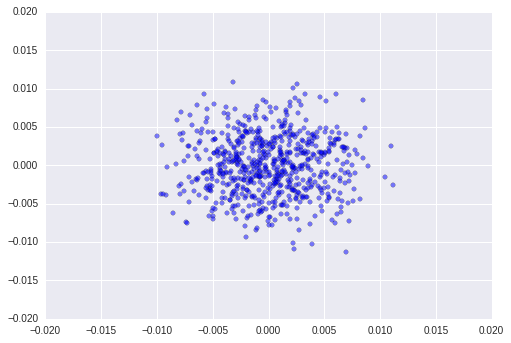

In [66]:
plt.scatter(X_new[:,0],X_new[:,1], alpha=0.5)

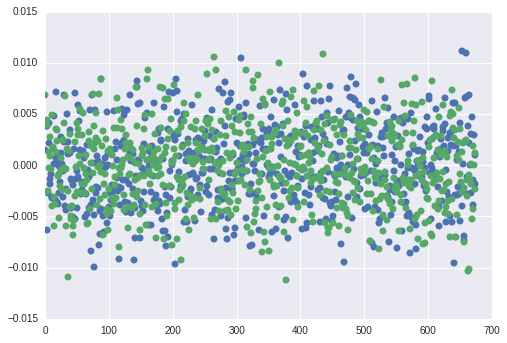

In [52]:
plt.plot(X_new, 'o')

## Model Stuff

In [25]:
import gensim
from gensim.models.doc2vec import TaggedDocument
from collections import namedtuple

from gensim.models import Doc2Vec
import gensim.models.doc2vec
from collections import OrderedDict
import multiprocessing

from gensim.test.test_doc2vec import ConcatenatedDoc2Vec

import pickle

In [2]:
!ls

docvecs_0.txt  docvecs_2.txt  process_data.ipynb  vectors2.log	vectors.log
docvecs_1.txt  docvecs.p      Untitled.ipynb	  vectors2.py	vectors.py


In [3]:
docvecs = pickle.load(open('docvecs.p','rb'))

In [18]:
mod = docvecs[0]

In [26]:
reload(sys)
sys.setdefaultencoding("utf-8")

In [27]:
dirname = '/scratch/sv1239/judge_data'
locale.setlocale(locale.LC_ALL, 'C')

'C'

In [33]:
def normalize_text(text):
    norm_text = text.lower()

    # Replace breaks with spaces
    norm_text = norm_text.replace('<br />', ' ')

    # Pad punctuation with spaces on both sides
    for char in ['.', '"', ',', '(', ')', '!', '?', ';', ':']:
        norm_text = norm_text.replace(char, ' ' + char + ' ')
    
    norm_text = re.sub( '\s+', ' ', norm_text).lstrip().rstrip() #remove extra and trailing spaces
    
    return norm_text

In [34]:
folders = os.listdir(dirname)
alldata = ''

for fol in folders:
    temp = ''
    output = fol.replace('/', '-') + '.txt'

    # Is there a better pattern to use?
    txt_files = glob.glob('/'.join([dirname, fol, '*.txt']))

    for txt in txt_files:
        with open(txt, 'r') as t:
            control_chars = [chr(0x85)]
            t_clean = t.read()

            t_clean = t_clean.replace('\n', ' ')
            t_clean = re.sub(r'[^\x00-\x7F]+',' ', t_clean)

            for c in control_chars:
                t_clean = t_clean.replace(c, ' ')

            temp += t_clean

    temp += "\n"

    temp_norm = normalize_text(temp)

    if len(temp_norm) == 1:
        continue

    with open('/'.join([dirname, output]), 'w') as n:
        n.write(temp_norm)

    alldata += temp_norm

In [29]:
with open('/'.join([dirname, 'alldata-id.txt']), 'w') as f:
    for idx, line in enumerate(alldata.splitlines()):
        num_line = "_*{0} {1}\n".format(idx, line)
        f.write(num_line)

NameError: name 'alldata' is not defined

In [31]:
SentimentDocument = namedtuple('SentimentDocument', 'words tags split sentiment')

In [32]:
!ls /home/sv1239/judge_data/

In [ ]:
alldocs = []  # will hold all docs in original order
with open(os.path.join(dirname, 'alldata-id.txt')) as alldata:
    for line_no, line in enumerate(alldata):
        tokens = gensim.utils.to_unicode(line).split()
        words = tokens[1:]
        tags = [line_no] # `tags = [tokens[0]]` would also work at extra memory cost
        split = ['train','test','extra','extra'][line_no//25000]  # 25k train, 25k test, 25k extra
        sentiment = [1.0, 0.0, 1.0, 0.0, None, None, None, None][line_no//12500] # [12.5K pos, 12.5K neg]*2 then unknown
        alldocs.append(SentimentDocument(words, tags, split, sentiment))

In [ ]:
train_docs = [doc for doc in alldocs if doc.split == 'train']
test_docs = [doc for doc in alldocs if doc.split == 'test']
doc_list = alldocs[:]  # for reshuffling per pass

cores = multiprocessing.cpu_count()
assert gensim.models.doc2vec.FAST_VERSION > -1, "this will be painfully slow otherwise"

simple_models = [
    # PV-DM w/concatenation - window=5 (both sides) approximates paper's 10-word total window size
    Doc2Vec(dm=1, dm_concat=1, size=100, window=5, negative=5, hs=0, min_count=2, workers=cores),
    # PV-DBOW 
    Doc2Vec(dm=0, size=100, negative=5, hs=0, min_count=2, workers=cores),
    # PV-DM w/average
    Doc2Vec(dm=1, dm_mean=1, size=100, window=10, negative=5, hs=0, min_count=2, workers=cores),
]

In [ ]:
# speed setup by sharing results of 1st model's vocabulary scan
simple_models[0].build_vocab(alldocs)  # PV-DM/concat requires one special NULL word so it serves as template
for model in simple_models[1:]:
    model.reset_from(simple_models[0])

models_by_name = OrderedDict((str(model), model) for model in simple_models)

models_by_name['dbow+dmm'] = ConcatenatedDoc2Vec([simple_models[1], simple_models[2]])
models_by_name['dbow+dmc'] = ConcatenatedDoc2Vec([simple_models[1], simple_models[0]])

# Create a document vector list and save it
doc_vec_list = [x.docvecs for x in simple_models]
pickle.dump(doc_vec_list, open('docvecs.p', 'wb'))

# pickle.dump(models_by_name, open('model.p', 'wb'))
